Epoch 1/10
4/4 [==============================] - 0s 14ms/step - loss: 81.3189
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0740
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0756
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0689
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0673
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0694
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0637
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0611
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0608
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0576


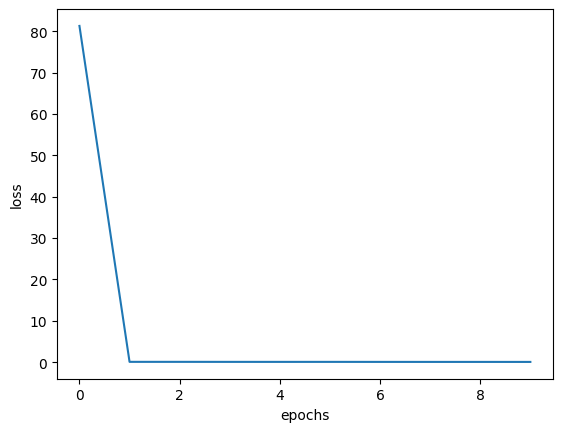

In [4]:
#regression model
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt 
np.random.seed(42)
x_train=np.linspace(1,10,100)
y_train=x_train*2+1
model=Sequential()
model.add(Input(1,))
model.add(Dense(units=1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(x_train,y_train,epochs=10)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [5]:
#gradient descent 

import numpy as np 
def initialise_parameters(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b 
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s 
def propogate(w,b,x,y):
    m=x.shape[1]
    A=sigmoid(np.dot(w.T,x))+b 
    cost=-1/m*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
    dw=1/m*np.dot(x,(A-y).T)
    db=1/m*np.sum((A-y))
    grads={'dw':dw,'db':db}
    return grads,cost 
def optimise(w,b,x,y,num_iterations,learning_rate,print_cost=True):
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,x,y)
        dw=grads['dw']
        db=grads['db']
        w-=learning_rate*dw
        b-=learning_rate*db 
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print("cost after iterations->%i:%f"%(i,cost))
    params={'w':w,'b':b}
    grads={'dw':dw,'db':db}
    return params,grads,cost 
def model(x_train,y_train,num_iterations=2000,learning_rate=0.5,print_cost=True):
    w,b=initialise_parameters(x_train.shape[0])
    parameters,_,cost=optimise(w,b,x_train,y_train,num_iterations,learning_rate,print_cost=True)
    w,b=parameters['w'],parameters['b']
    return {'cost':cost,'w':w,'b':b,'learning_rate':learning_rate,'num_iterations':num_iterations}
np.random.seed(0)
x_train=np.random.randn(20,1000)
y_train=np.random.randint(2,size=(1,1000))
x_test=np.random.randn(20,200)
y_test=np.random.randint(2,size=(1,200))
res=model(x_train,y_train,num_iterations=2000,learning_rate=0.5,print_cost=True)
    
            
    

cost after iterations->0:0.693147
cost after iterations->100:0.683099
cost after iterations->200:0.683099
cost after iterations->300:0.683099
cost after iterations->400:0.683099
cost after iterations->500:0.683099
cost after iterations->600:0.683099
cost after iterations->700:0.683099
cost after iterations->800:0.683099
cost after iterations->900:0.683099
cost after iterations->1000:0.683099
cost after iterations->1100:0.683099
cost after iterations->1200:0.683099
cost after iterations->1300:0.683099
cost after iterations->1400:0.683099
cost after iterations->1500:0.683099
cost after iterations->1600:0.683099
cost after iterations->1700:0.683099
cost after iterations->1800:0.683099
cost after iterations->1900:0.683099


In [6]:
#xor gate 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)

y = np.array([[0],
              [1],
              [1],
              [0]], dtype=np.float32)

# Define the neural network model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # First hidden layer with 2 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))            # Output layer with 1 neuron and sigmoid activation

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(X)
print('Predictions:')
print(predictions)

# Optional: Print the final weights of the model
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)


1/1 [==============================] - 0s 176ms/step - loss: 0.6931 - accuracy: 0.5000
Accuracy: 50.00%
1/1 [==============================] - 0s 56ms/step
Predictions:
[[0.5       ]
 [0.49999988]
 [0.5       ]
 [0.49999982]]
[array([[ 0.65949804, -0.02218628],
       [ 1.157893  , -0.30752796]], dtype=float32), array([-0.659448,  0.      ], dtype=float32)]
[array([[-5.4599241e-08],
       [ 2.0473983e-06]], dtype=float32), array([-8.4572946e-08], dtype=float32)]


In [ ]:
def initialise_parameters(dim):
    